In [1]:
#importing all the libraries, which we are going to need during the process of decision tree creation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
%matplotlib inline

C:\Users\alex2\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#importing to the Python excel document to work with
data = pd.read_csv("IBM_people_dataset.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Calculating the variance of some variables, to show the insignificance of them in our model
np.var(data["EmployeeCount"])
np.var(data["StandardHours"])
np.var(data["HourlyRate"])
np.var(data["DailyRate"])
np.var(data["MonthlyRate"])
print(np.var(data["EmployeeCount"]))
print(np.var(data["StandardHours"]))
print(np.var(data["HourlyRate"]))
print(np.var(data["DailyRate"]))
print(np.var(data["MonthlyRate"]))

0.0
0.0
413.004479615
162708.832109
50628413.626


In [4]:
#droping the variables with low variances + Over18,because all the employees are over 18.
#as the variance of Monthly Rate is high, we are going to keep this one instead of Daily and Hourly rates,to see its impact on the model
#Hourly,Daily and Monthly rates are in linear connection, that's is why we can drop one of them.
data = data.drop(["EmployeeCount"],axis=1)
data = data.drop(["Over18"],axis=1)
data = data.drop(["StandardHours"],axis=1)
data = data.drop(["HourlyRate"],axis=1)
data = data.drop(["DailyRate"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [5]:
#categorising the Business Travel and Marital Status variables, using where function
#get integers, and make it easier to work with
data["BusinessTravel"] = data["BusinessTravel"].astype("category").cat.reorder_categories(["Non-Travel","Travel_Rarely","Travel_Frequently"]).cat.codes
data["BusinessTravel"] = data["BusinessTravel"].where(data["BusinessTravel"]==0,1)
data["MaritalStatus"] = data["MaritalStatus"].astype("category").cat.reorder_categories(["Single","Married","Divorced"]).cat.codes
data["MaritalStatus"] = data["MaritalStatus"].where(data["MaritalStatus"]==1,0)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,1,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#categorising the Business Travel and Marital Status variables
#get integers, and make it easier to work with
data["Attrition"] = data["Attrition"].astype("category").cat.reorder_categories(["Yes","No"]).cat.codes
data["Gender"] = data["Gender"].astype("category").cat.reorder_categories(["Female","Male"]).cat.codes
data["OverTime"] = data["OverTime"].astype("category").cat.reorder_categories(["Yes","No"]).cat.codes
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,1,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,1,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
#distibuting our data into two groups, lower of the mean and higher of it.
def age(x):
    if x<39:
        return 0
    else:
        return 1
    

In [8]:
#appling the function defined above
data["Age"] = data["Age"].apply(age)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
#checking the types of variables
#determining the variables, which are not integers ("Department","EduactionField","JobRole")
data.dtypes

Age                          int64
Attrition                     int8
BusinessTravel                int8
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                        int8
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus                 int8
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                      int8
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [10]:
#get dummy variables for each not integers in our dataset starting from the first one ("Department")
department = pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [11]:
#drop one of the columns to avoid the upcoming problems of overlaping dataset
dropdepartment = department.drop(["Human Resources"],axis=1)
dropdepartment.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [12]:
#droping the "old" column
data = data.drop(["Department"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,1,2,Life Sciences,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,8,1,Life Sciences,2,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,2,2,Other,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,3,4,Life Sciences,5,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,2,1,Medical,7,1,1,3,...,3,4,1,6,3,3,2,2,2,2


In [13]:
#get dummy variables for each not integers in our dataset starting from the first one ("EducationField")
educationfield = pd.get_dummies(data["EducationField"])
educationfield.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [14]:
#drop one of the columns to avoid the upcoming problems of overlaping dataset
dropeducationfield = educationfield.drop(["Human Resources"],axis=1)
dropeducationfield.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [15]:
#droping the "old" column
data = data.drop(["EducationField"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,1,2,1,2,0,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,8,1,2,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,2,2,4,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,3,4,5,4,0,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,2,1,7,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [16]:
#get dummy variables for each not integers in our dataset starting from the first one ("JobRole")
jobrole = pd.get_dummies(data["JobRole"])
jobrole.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [17]:
#drop one of the columns to avoid the upcoming problems of overlaping dataset
dropjobrole = jobrole.drop(["Human Resources"],axis=1)
dropjobrole.head()

,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [18]:
#droping the "old" column
data = data.drop(["JobRole"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,1,2,1,2,0,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,8,1,2,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,2,2,4,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,3,4,5,4,0,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,2,1,7,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [19]:
#move attrition column to the very left to be able to construct a presice correlation matrix
front = data['Attrition']
data.drop(labels = ["Attrition"], axis = 1, inplace = True)
data.insert(0,"Attrition",front)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,1,1,2,1,2,0,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,1,1,8,1,2,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,2,2,4,4,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,3,4,5,4,0,3,1,...,3,3,0,8,3,3,8,7,3,0
4,1,0,1,2,1,7,1,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [20]:
#missing data check
data.isnull().any()

Attrition                   False
Age                         False
BusinessTravel              False
DistanceFromHome            False
Education                   False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [21]:
data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.838776,0.383673,0.897959,9.192517,2.912925,1024.865306,2.721769,0.600000,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,0.486445,0.302805,8.106864,1.024165,602.024335,1.093082,0.490065,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,2.000000,491.250000,2.000000,0.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,0.000000,1.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,1.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,1.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,0.106252,-0.074457,-0.077924,0.031373,0.010577,0.103369,-0.029453,0.130016,0.169105,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
Age,0.106252,1.000000,-0.006696,0.012674,0.099897,0.017443,-0.001380,-0.021131,0.036026,0.470204,...,0.008881,0.056035,0.020124,0.575050,0.005626,0.003307,0.275791,0.156313,0.204588,0.155527
BusinessTravel,-0.074457,-0.006696,1.000000,-0.023605,-0.004524,-0.022272,-0.003568,-0.050461,0.045779,0.007295,...,-0.018310,-0.021132,-0.028807,0.029742,0.020746,-0.005780,-0.007623,-0.011549,-0.020815,-0.016716
DistanceFromHome,-0.077924,0.012674,-0.023605,1.000000,0.021042,0.032916,-0.016075,-0.001851,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.031373,0.099897,-0.004524,0.021042,1.000000,0.042070,-0.027128,-0.016547,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,0.010577,0.017443,-0.022272,0.032916,0.042070,1.000000,0.017621,0.022556,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.103369,-0.001380,-0.003568,-0.016075,-0.027128,0.017621,1.000000,0.000508,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.029453,-0.021131,-0.050461,-0.001851,-0.016547,0.022556,0.000508,1.000000,0.017960,-0.039403,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
JobInvolvement,0.130016,0.036026,0.045779,0.008783,0.042438,-0.006888,-0.008278,0.017960,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.169105,0.470204,0.007295,0.005303,0.101589,-0.018519,0.001212,-0.039403,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


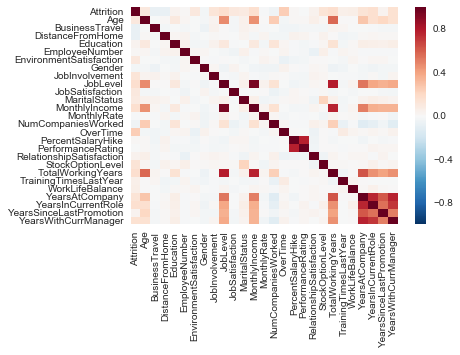

In [22]:
#Correlation matrix creation
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [23]:
#joining of the droped datas (from Department, EduactionField, JobRole - 23,24,25)
data = data.join(dropdepartment)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,0,1,1,1,2,1,2,0,3,2,...,0,8,0,1,6,4,0,5,0,1
1,1,1,1,8,1,2,3,1,2,2,...,1,10,3,3,10,7,1,7,1,0
2,0,0,1,2,2,4,4,1,2,1,...,0,7,3,3,0,0,0,0,1,0
3,1,0,1,3,4,5,4,0,3,1,...,0,8,3,3,8,7,3,0,1,0
4,1,0,1,2,1,7,1,1,3,1,...,1,6,3,3,2,2,2,2,1,0


In [24]:
data = data.join(dropeducationfield)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,1,1,2,1,2,0,3,2,...,4,0,5,0,1,1,0,0,0,0
1,1,1,1,8,1,2,3,1,2,2,...,7,1,7,1,0,1,0,0,0,0
2,0,0,1,2,2,4,4,1,2,1,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,3,4,5,4,0,3,1,...,7,3,0,1,0,1,0,0,0,0
4,1,0,1,2,1,7,1,1,3,1,...,2,2,2,1,0,0,0,1,0,0


In [25]:
data = data.join(dropjobrole)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,1,1,1,2,1,2,0,3,2,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,8,1,2,3,1,2,2,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,2,2,4,4,1,2,1,...,1,0,0,1,0,0,0,0,0,0
3,1,0,1,3,4,5,4,0,3,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,2,1,7,1,1,3,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
data["Attrition"].value_counts()/len(data)*100

1    83.877551
0    16.122449
Name: Attrition, dtype: float64

In [27]:
model = DecisionTreeClassifier(random_state=57)

In [28]:
inputs = data.iloc[:,1:]
output = data["Attrition"]
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=57, splitter='best')

In [29]:
model.score(inputs,output)*100

100.0

In [30]:
export_graphviz(model,"tree.dot")


In [31]:
train, test = train_test_split(data,train_size=0.8)
train, test = train_test_split(data,test_size=0.2)

In [32]:
model_x = DecisionTreeClassifier(max_depth=4,random_state=57)
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.8)

In [33]:
model_x.fit(inputs_train,output_train)
model_x.score(inputs_test,output_test)*100

82.312925170068027

In [34]:
export_graphviz(model_x,"tree_x.dot")

In [35]:
df = pd.DataFrame(index=list(data)[1:],data = model.feature_importances_)
df

,0
Age,0.009865
BusinessTravel,0.000000
DistanceFromHome,0.044688
Education,0.014410
EmployeeNumber,0.053295
EnvironmentSatisfaction,0.031435
Gender,0.022715
JobInvolvement,0.034236
JobLevel,0.023309
JobSatisfaction,0.034338


In [36]:
df.sort_values(by=0, ascending = False)

,0
MonthlyIncome,0.115452
OverTime,0.060574
TotalWorkingYears,0.059754
EmployeeNumber,0.053295
StockOptionLevel,0.051686
YearsInCurrentRole,0.047382
WorkLifeBalance,0.046893
DistanceFromHome,0.044688
NumCompaniesWorked,0.040155
TrainingTimesLastYear,0.038507
